In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Customer Data Pre Processing

In [2]:
cust_data=pd.read_csv("C:/Users/Vikas/Machine Learning/DSL/93fe009c-2-Foreclosure-Prediction-Dataset_/Customers_31JAN2019.csv")

In [3]:
cust_data.head()

,CUSTOMERID,CUST_CONSTTYPE_ID,CUST_CATEGORYID,PROFESSION,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,OCCUPATION,POSITION,GROSS_INCOME,PRE_JOBYEARS,NETTAKEHOMEINCOME,BRANCH_PINCODE
0,12001000,1,5,NaN,33.0,M,M,POSTGRAD,0.0,NaN,NaN,198375.2218,8.0,198375.2218,400070.0
1,12001001,1,5,NaN,44.0,M,M,POSTGRAD,0.0,NaN,NaN,242703.9829,10.0,242703.9829,400070.0
2,12001002,1,7,NaN,50.0,M,M,GRAD,0.0,NaN,NaN,0.0000,NaN,0.0000,400070.0
3,12001003,3,4,NaN,40.0,M,M,GRAD,0.0,NaN,NaN,365263.5116,NaN,365263.5161,400070.0
4,12001004,3,4,NaN,27.0,M,M,GRAD,0.0,NaN,NaN,187342.1990,NaN,187342.1990,400070.0


In [4]:
cust_data.columns

Index(['CUSTOMERID', 'CUST_CONSTTYPE_ID', 'CUST_CATEGORYID', 'PROFESSION',
       'AGE', 'SEX', 'MARITAL_STATUS', 'QUALIFICATION', 'NO_OF_DEPENDENT',
       'OCCUPATION', 'POSITION', 'GROSS_INCOME', 'PRE_JOBYEARS',
       'NETTAKEHOMEINCOME', 'BRANCH_PINCODE'],
      dtype='object')

In [5]:
#All values are NA
del cust_data['PROFESSION']
del cust_data['OCCUPATION']

In [6]:
#more than 76% values are NA
del cust_data['POSITION']
del cust_data['PRE_JOBYEARS']

In [7]:
cust_data.columns

Index(['CUSTOMERID', 'CUST_CONSTTYPE_ID', 'CUST_CATEGORYID', 'AGE', 'SEX',
       'MARITAL_STATUS', 'QUALIFICATION', 'NO_OF_DEPENDENT', 'GROSS_INCOME',
       'NETTAKEHOMEINCOME', 'BRANCH_PINCODE'],
      dtype='object')

In [8]:
#Filling NA with mode values
cust_data['SEX']=cust_data['SEX'].fillna('M')

In [9]:
#Filling NA with mode values
cust_data['MARITAL_STATUS']=cust_data['MARITAL_STATUS'].fillna('M')

In [10]:
#Filling NA with mode values
cust_data['NO_OF_DEPENDENT']=cust_data['NO_OF_DEPENDENT'].fillna(0.0)

In [11]:
cust_data['AGE'].mode()

0    34.0
dtype: float64

In [12]:
#Filling NA with mode values
cust_data['AGE']=cust_data['AGE'].fillna('34.0')

In [13]:
cust_knn_data=cust_data.copy()

# #Using KNN to impute Qualification NA Values

In [14]:
del cust_knn_data['CUSTOMERID']
del cust_knn_data['CUST_CONSTTYPE_ID']
del cust_knn_data['CUST_CATEGORYID']
del cust_knn_data['AGE']
del cust_knn_data['MARITAL_STATUS']
del cust_knn_data['NO_OF_DEPENDENT']
del cust_knn_data['BRANCH_PINCODE']

In [15]:
test=cust_knn_data[cust_knn_data['QUALIFICATION'].isnull()]
train=cust_knn_data[-cust_knn_data['QUALIFICATION'].isnull()]

In [16]:
train['GROSS_INCOME'].groupby(train['QUALIFICATION']).mean()

QUALIFICATION
DOCTRATE    118062.813219
ENG         154885.715125
GRAD        238110.161236
MAT          72369.246953
OTHERS      102848.588674
POSTGRAD    202388.843907
PRF         347811.654857
UG           89866.523718
Name: GROSS_INCOME, dtype: float64

In [17]:
msng_vals=train.isnull().sum()
msng_vals

SEX                  0
QUALIFICATION        0
GROSS_INCOME         0
NETTAKEHOMEINCOME    0
dtype: int64

In [18]:
msng_vals=test.isnull().sum()
msng_vals

SEX                    0
QUALIFICATION        603
GROSS_INCOME           0
NETTAKEHOMEINCOME      0
dtype: int64

In [19]:
test.shape

(603, 4)

In [20]:
train.shape

(9397, 4)

In [21]:
train.head()

,SEX,QUALIFICATION,GROSS_INCOME,NETTAKEHOMEINCOME
0,M,POSTGRAD,198375.2218,198375.2218
1,M,POSTGRAD,242703.9829,242703.9829
2,M,GRAD,0.0000,0.0000
3,M,GRAD,365263.5116,365263.5161
4,M,GRAD,187342.1990,187342.1990


In [22]:
test.head()

,SEX,QUALIFICATION,GROSS_INCOME,NETTAKEHOMEINCOME
31,M,NaN,1.206504e+06,1.206504e+06
37,M,NaN,0.000000e+00,0.000000e+00
60,M,NaN,2.948650e+05,2.948650e+05
61,M,NaN,1.576361e+05,1.576361e+05
63,M,NaN,0.000000e+00,0.000000e+00


In [23]:
train.index=np.arange(0,train.shape[0])
test.index=np.arange(0,test.shape[0])

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train['SEX'])
train['SEX']=le.transform(train['SEX'])
test['SEX']=le.transform(test['SEX'])

In [25]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le1.fit(train['QUALIFICATION'])
train['QUALIFICATION']=le1.transform(train['QUALIFICATION'])

In [26]:
#Nearest Neighbour is 2(gives more better distribution)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(train.loc[:,['GROSS_INCOME','NETTAKEHOMEINCOME']], train['QUALIFICATION'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [27]:
test['QUALIFICATION']=le1.inverse_transform(neigh.predict(test.loc[:,['GROSS_INCOME','NETTAKEHOMEINCOME']]))

In [28]:
test['GROSS_INCOME'].groupby(test['QUALIFICATION']).mean()

QUALIFICATION
DOCTRATE    131087.144100
GRAD        142415.327866
MAT          81820.621100
OTHERS        1303.760204
POSTGRAD     68633.631005
PRF         120771.097209
UG           94843.351831
Name: GROSS_INCOME, dtype: float64

In [29]:
cust_knn_data['QUALIFICATION']=cust_knn_data['QUALIFICATION'].fillna(test['QUALIFICATION'])

In [30]:
msng_vals=cust_knn_data.isnull().sum()
msng_vals

SEX                    0
QUALIFICATION        553
GROSS_INCOME           0
NETTAKEHOMEINCOME      0
dtype: int64

In [31]:
cust_knn_data.shape

(10000, 4)

In [32]:
cust_data['QUALIFICATION'].head()

0    POSTGRAD
1    POSTGRAD
2        GRAD
3        GRAD
4        GRAD
Name: QUALIFICATION, dtype: object

In [33]:
cust_knn_data['QUALIFICATION'].head()

0    POSTGRAD
1    POSTGRAD
2        GRAD
3        GRAD
4        GRAD
Name: QUALIFICATION, dtype: object

# Copying predicted values to main dataset

In [34]:
cust_data['QUALIFICATION']=cust_knn_data['QUALIFICATION'].copy()

In [35]:
#fill NA values with mode of Branch code
cust_data['BRANCH_PINCODE']=cust_data['BRANCH_PINCODE'].fillna(400070.0)

In [36]:
msng_vals=cust_data.isnull().sum()
msng_vals

CUSTOMERID             0
CUST_CONSTTYPE_ID      0
CUST_CATEGORYID        0
AGE                    0
SEX                    0
MARITAL_STATUS         0
QUALIFICATION        553
NO_OF_DEPENDENT        0
GROSS_INCOME           0
NETTAKEHOMEINCOME      0
BRANCH_PINCODE         0
dtype: int64

# Agreement Data Pre Processing

In [37]:
agree_data=pd.read_csv("C:/Users/Vikas/Machine Learning/DSL/93fe009c-2-Foreclosure-Prediction-Dataset_/LMS_31JAN2019.csv")

In [38]:
#agree_data['AGREEMENTID'].value_counts()

In [39]:
agree_data.head()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,...,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.7,10.6,58.0,120,1,...,40.06,39,19.0,0.0,0.6000,HL,10901100.0,NaN,NaN,39
1,11220002,12001001.0,19290253.32,19290253.32,15-09-2010,13.7,10.6,137.0,180,1,...,84.31,38,99.0,0.0,0.6000,HL,10901100.0,NaN,NaN,38
2,11220003,12001002.0,4053498.66,4053498.66,06-09-2010,17.2,12.5,360.0,180,5,...,79.34,38,322.0,0.0,0.9100,HL,10901101.0,NaN,NaN,38
3,11220004,12001003.0,13257031.92,13257031.92,29-09-2010,15.6,10.9,198.0,180,5,...,86.86,37,161.0,0.0,0.9686,HL,10901101.0,NaN,NaN,38
4,11220005,12001004.0,13211403.04,13211403.04,06-09-2010,16.5,11.9,142.0,180,5,...,40.93,38,104.0,0.0,0.7300,HL,10901101.0,NaN,NaN,38


In [40]:
agree_data.shape

(624250, 38)

In [41]:
agree_data[agree_data['CURRENT_TENOR'].isnull()]

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,...,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
286771,11233980,12014979.0,1544872.41,1544872.41,30-04-2017,15.0,15.0,NaN,180,5,...,34.01,0,NaN,0.0,0.39,STHL,10901298.0,0,0,5
286772,11234225,12015224.0,1216235.76,1216235.76,12-05-2017,15.0,15.0,NaN,240,5,...,46.48,0,NaN,0.0,0.40,STHL,10901298.0,0,0,4
416329,11235058,12016057.0,1157499.06,1157499.06,28-06-2017,13.7,13.7,NaN,180,5,...,62.76,0,NaN,0.0,0.35,STHL,10901285.0,NaN,NaN,11
416997,11238278,12019277.0,1201036.64,1201036.64,13-11-2017,17.4,17.4,NaN,180,5,...,20.41,0,NaN,0.0,0.35,STHL,10901291.0,NaN,NaN,6
537704,11243831,12024830.0,3738226.54,3738226.54,28-03-2018,16.2,16.2,NaN,240,5,...,83.52,0,NaN,0.0,0.56,STHL,10901291.0,NaN,NaN,7


In [42]:
#Completed Tenure is 0 so Current Tenure is same as original tenure
print(agree_data.loc[286771,'CURRENT_TENOR'])
print(agree_data.loc[286772,'CURRENT_TENOR'])
print(agree_data.loc[416329,'CURRENT_TENOR'])
print(agree_data.loc[416997,'CURRENT_TENOR'])
print(agree_data.loc[537704,'CURRENT_TENOR'])

nan
nan
nan
nan
nan


In [43]:
agree_data.loc[286771,'CURRENT_TENOR']=agree_data.loc[286771,'ORIGNAL_TENOR']
agree_data.loc[286772,'CURRENT_TENOR']=agree_data.loc[286772,'ORIGNAL_TENOR']
agree_data.loc[416329,'CURRENT_TENOR']=agree_data.loc[416329,'ORIGNAL_TENOR']
agree_data.loc[416997,'CURRENT_TENOR']=agree_data.loc[416997,'ORIGNAL_TENOR']
agree_data.loc[537704,'CURRENT_TENOR']=agree_data.loc[537704,'ORIGNAL_TENOR']

In [44]:
agree_data['CITY'].mode()

0    MUMBAI
dtype: object

In [45]:
#filling CITY NA values with mode
agree_data['CITY']=agree_data['CITY'].fillna('MUMBAI')

In [46]:
#Completed Tenure is 0 so Balance Tenure is same as Original Tenure
agree_data.loc[286771,'BALANCE_TENURE']=agree_data.loc[286771,'ORIGNAL_TENOR']
agree_data.loc[286772,'BALANCE_TENURE']=agree_data.loc[286772,'ORIGNAL_TENOR']
agree_data.loc[416329,'BALANCE_TENURE']=agree_data.loc[416329,'ORIGNAL_TENOR']
agree_data.loc[416997,'BALANCE_TENURE']=agree_data.loc[416997,'ORIGNAL_TENOR']
agree_data.loc[537704,'BALANCE_TENURE']=agree_data.loc[537704,'ORIGNAL_TENOR']

In [47]:
nagree_data=agree_data.copy()

In [48]:
nagree_data.shape

(624250, 38)

In [49]:
#Filling NA values of Last receipt date by authorization date as completed tenure is 0
for i in nagree_data[nagree_data['LAST_RECEIPT_DATE'].isnull()].index:
    nagree_data.loc[i,'LAST_RECEIPT_DATE']=nagree_data.loc[i,'AUTHORIZATIONDATE']

In [50]:
nagree_data.loc[:,['INTEREST_START_DATE','AUTHORIZATIONDATE','LAST_RECEIPT_DATE']].head()

,INTEREST_START_DATE,AUTHORIZATIONDATE,LAST_RECEIPT_DATE
0,30-08-2010,29-08-2010,01-11-2013
1,15-09-2010,15-09-2010,01-11-2013
2,06-09-2010,06-09-2010,05-11-2013
3,29-09-2010,29-09-2010,05-11-2013
4,06-09-2010,06-09-2010,05-11-2013


In [51]:
nagree_data.loc[:,['LOAN_AMT','NET_DISBURSED_AMT','PRE_EMI_DUEAMT','PRE_EMI_RECEIVED_AMT','EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING','LAST_RECEIPT_AMOUNT']].head()

,LOAN_AMT,NET_DISBURSED_AMT,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_AMOUNT
0,11710107.24,11710107.24,7994.273589,7994.273589,184544.3966,29042.45880,29042.4588,0.00000,184544.39660,2.262177e+06,9.447930e+06,2617476.019,9.338009e+06,83559.0
1,19290253.32,19290253.32,100504.575900,100504.575900,279448.0846,0.00000,0.0000,0.00000,279448.08460,1.234760e+07,6.942656e+06,4945153.591,1.713861e+07,126530.0
2,4053498.66,4053498.66,0.000000,0.000000,0.0000,0.44171,0.0000,0.44171,-0.44171,3.944954e+06,1.085444e+05,1549566.273,3.944954e+06,30898.0
3,13257031.92,13257031.92,28441.732660,28441.732660,0.0000,0.00000,0.0000,0.00000,0.00000,1.030278e+07,2.954253e+06,4219463.668,1.255472e+07,88256.0
4,13211403.04,13211403.04,0.000000,0.000000,0.0000,0.00000,0.0000,0.00000,0.00000,8.479158e+06,4.732245e+06,3812974.258,1.178201e+07,91892.0


In [52]:
#Filling NA values of Last receipt amoount by pre emi received amount as completed tenure is 0
for i in nagree_data[nagree_data['LAST_RECEIPT_AMOUNT'].isnull()].index:
    nagree_data.loc[i,'LAST_RECEIPT_AMOUNT']=nagree_data.loc[i,'PRE_EMI_RECEIVED_AMT']

In [53]:
nagree_data.shape

(624250, 38)

In [54]:
nagree_data['DPD'].mode()

0    0.0
dtype: float64

In [55]:
#filling DPD NA values with mode
nagree_data['DPD']=agree_data['DPD'].fillna(0.0)

In [56]:
agree_vals=nagree_data.isnull().sum()
agree_vals

AGREEMENTID                   0
CUSTOMERID                  516
LOAN_AMT                      0
NET_DISBURSED_AMT             0
INTEREST_START_DATE           0
CURRENT_ROI                   0
ORIGNAL_ROI                   0
CURRENT_TENOR                 0
ORIGNAL_TENOR                 0
DUEDAY                        0
AUTHORIZATIONDATE             0
CITY                          0
PRE_EMI_DUEAMT                0
PRE_EMI_RECEIVED_AMT          0
PRE_EMI_OS_AMOUNT             0
EMI_DUEAMT                    0
EMI_RECEIVED_AMT              0
EMI_OS_AMOUNT                 0
EXCESS_AVAILABLE              0
EXCESS_ADJUSTED_AMT           0
BALANCE_EXCESS                0
NET_RECEIVABLE                0
OUTSTANDING_PRINCIPAL         0
PAID_PRINCIPAL                0
PAID_INTEREST                 0
MONTHOPENING                  0
LAST_RECEIPT_DATE             0
LAST_RECEIPT_AMOUNT           0
NET_LTV                       0
COMPLETED_TENURE              0
BALANCE_TENURE                0
DPD     

# Master Dataset

In [57]:
master_data=nagree_data.copy()

In [58]:
master_data.columns

Index(['AGREEMENTID', 'CUSTOMERID', 'LOAN_AMT', 'NET_DISBURSED_AMT',
       'INTEREST_START_DATE', 'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR',
       'ORIGNAL_TENOR', 'DUEDAY', 'AUTHORIZATIONDATE', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_DATE', 'LAST_RECEIPT_AMOUNT', 'NET_LTV',
       'COMPLETED_TENURE', 'BALANCE_TENURE', 'DPD', 'FOIR', 'PRODUCT',
       'SCHEMEID', 'NPA_IN_LAST_MONTH', 'NPA_IN_CURRENT_MONTH', 'MOB'],
      dtype='object')

In [59]:
cust_data.columns

Index(['CUSTOMERID', 'CUST_CONSTTYPE_ID', 'CUST_CATEGORYID', 'AGE', 'SEX',
       'MARITAL_STATUS', 'QUALIFICATION', 'NO_OF_DEPENDENT', 'GROSS_INCOME',
       'NETTAKEHOMEINCOME', 'BRANCH_PINCODE'],
      dtype='object')

In [60]:
master_data=master_data.sort_values(['AGREEMENTID','MOB'])

In [61]:
master_data.head(10)

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,...,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.7,10.6,58.0,120,1,...,40.06,39,19.0,0.0,0.60,HL,10901100.0,NaN,NaN,39
2855,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.7,10.6,58.0,120,1,...,40.06,40,18.0,0.0,0.60,HL,10901100.0,NaN,NaN,40
5825,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.4,10.6,58.0,120,1,...,40.06,41,17.0,0.0,0.60,HL,10901100.0,NaN,NaN,41
8928,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.4,10.6,58.0,120,1,...,40.06,41,17.0,0.0,0.60,HL,10901100.0,NaN,NaN,42
12193,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.4,10.6,58.0,120,1,...,40.06,43,15.0,0.0,0.60,HL,10901100.0,NaN,NaN,43
15534,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.4,10.6,58.0,120,1,...,40.06,44,14.0,0.0,0.60,HL,10901100.0,NaN,NaN,44
18931,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.4,10.6,45.0,120,1,...,40.06,45,0.0,0.0,0.60,HL,10901100.0,NaN,NaN,45
1,11220002,12001001.0,19290253.32,19290253.32,15-09-2010,13.7,10.6,137.0,180,1,...,84.31,38,99.0,0.0,0.60,HL,10901100.0,NaN,NaN,38
2,11220003,12001002.0,4053498.66,4053498.66,06-09-2010,17.2,12.5,360.0,180,5,...,79.34,38,322.0,0.0,0.91,HL,10901101.0,NaN,NaN,38
2856,11220003,12001002.0,4053498.66,4053498.66,06-09-2010,17.2,12.5,360.0,180,5,...,79.34,39,321.0,0.0,0.91,HL,10901101.0,NaN,NaN,39


In [62]:
master_data.shape[0]

624250

In [63]:
master_data.index=np.arange(0,master_data.shape[0])

In [64]:
master_data.head(10)

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,...,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.7,10.6,58.0,120,1,...,40.06,39,19.0,0.0,0.60,HL,10901100.0,NaN,NaN,39
1,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.7,10.6,58.0,120,1,...,40.06,40,18.0,0.0,0.60,HL,10901100.0,NaN,NaN,40
2,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.4,10.6,58.0,120,1,...,40.06,41,17.0,0.0,0.60,HL,10901100.0,NaN,NaN,41
3,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.4,10.6,58.0,120,1,...,40.06,41,17.0,0.0,0.60,HL,10901100.0,NaN,NaN,42
4,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.4,10.6,58.0,120,1,...,40.06,43,15.0,0.0,0.60,HL,10901100.0,NaN,NaN,43
5,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.4,10.6,58.0,120,1,...,40.06,44,14.0,0.0,0.60,HL,10901100.0,NaN,NaN,44
6,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.4,10.6,45.0,120,1,...,40.06,45,0.0,0.0,0.60,HL,10901100.0,NaN,NaN,45
7,11220002,12001001.0,19290253.32,19290253.32,15-09-2010,13.7,10.6,137.0,180,1,...,84.31,38,99.0,0.0,0.60,HL,10901100.0,NaN,NaN,38
8,11220003,12001002.0,4053498.66,4053498.66,06-09-2010,17.2,12.5,360.0,180,5,...,79.34,38,322.0,0.0,0.91,HL,10901101.0,NaN,NaN,38
9,11220003,12001002.0,4053498.66,4053498.66,06-09-2010,17.2,12.5,360.0,180,5,...,79.34,39,321.0,0.0,0.91,HL,10901101.0,NaN,NaN,39


In [65]:
master_data['RANK']=master_data.groupby('AGREEMENTID')['MOB'].rank(ascending=0,method='dense')
master_data['PAYMENTTIMES']=master_data.groupby('AGREEMENTID')['MOB'].rank(ascending=1,method='dense')

In [66]:
master_data.head(8)

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,...,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB,RANK,PAYMENTTIMES
0,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.7,10.6,58.0,120,1,...,19.0,0.0,0.6,HL,10901100.0,NaN,NaN,39,7.0,1.0
1,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.7,10.6,58.0,120,1,...,18.0,0.0,0.6,HL,10901100.0,NaN,NaN,40,6.0,2.0
2,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.4,10.6,58.0,120,1,...,17.0,0.0,0.6,HL,10901100.0,NaN,NaN,41,5.0,3.0
3,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.4,10.6,58.0,120,1,...,17.0,0.0,0.6,HL,10901100.0,NaN,NaN,42,4.0,4.0
4,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.4,10.6,58.0,120,1,...,15.0,0.0,0.6,HL,10901100.0,NaN,NaN,43,3.0,5.0
5,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.4,10.6,58.0,120,1,...,14.0,0.0,0.6,HL,10901100.0,NaN,NaN,44,2.0,6.0
6,11220001,12001000.0,11710107.24,11710107.24,30-08-2010,13.4,10.6,45.0,120,1,...,0.0,0.0,0.6,HL,10901100.0,NaN,NaN,45,1.0,7.0
7,11220002,12001001.0,19290253.32,19290253.32,15-09-2010,13.7,10.6,137.0,180,1,...,99.0,0.0,0.6,HL,10901100.0,NaN,NaN,38,1.0,1.0


# Master Data by keeping latest Agreement Info

In [67]:
fmaster_data=master_data[master_data['RANK']==1.0]

In [68]:
fmaster_data.shape

(33354, 40)

In [69]:
fmaster_data.index=np.arange(0,fmaster_data.shape[0])

In [70]:
fmaster_data.columns

Index(['AGREEMENTID', 'CUSTOMERID', 'LOAN_AMT', 'NET_DISBURSED_AMT',
       'INTEREST_START_DATE', 'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR',
       'ORIGNAL_TENOR', 'DUEDAY', 'AUTHORIZATIONDATE', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_DATE', 'LAST_RECEIPT_AMOUNT', 'NET_LTV',
       'COMPLETED_TENURE', 'BALANCE_TENURE', 'DPD', 'FOIR', 'PRODUCT',
       'SCHEMEID', 'NPA_IN_LAST_MONTH', 'NPA_IN_CURRENT_MONTH', 'MOB', 'RANK',
       'PAYMENTTIMES'],
      dtype='object')

In [71]:
train=pd.read_csv("C:/Users/Vikas/Machine Learning/DSL/93fe009c-2-Foreclosure-Prediction-Dataset_/train_foreclosure.csv")

In [72]:
test=pd.read_csv("C:/Users/Vikas/Machine Learning/DSL/93fe009c-2-Foreclosure-Prediction-Dataset_/test_foreclosure.csv")

In [73]:
train.shape

(20012, 2)

In [74]:
test.shape

(13342, 2)

In [75]:
#Appending train and test
data=train.copy()
data=data.append(test)
data.shape

(33354, 2)

In [76]:
#Merging Train and Test Foreclosure with Agreement
fmaster_data=pd.merge(fmaster_data,data,how='left',on='AGREEMENTID')

In [77]:
#Merging Cust_data with Agreement
fmaster_data=pd.merge(fmaster_data,cust_data,how='left',on='CUSTOMERID')

In [78]:
fmaster_data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            33344, 33345, 33346, 33347, 33348, 33349, 33350, 33351, 33352,
            33353],
           dtype='int64', length=33354)

In [79]:
fmaster_data.shape

(33354, 51)

In [80]:
#Replacing Yes with 1 and #N/ with 0
fmaster_data['NPA_IN_LAST_MONTH']=fmaster_data['NPA_IN_LAST_MONTH'].replace('Yes',1)
fmaster_data['NPA_IN_LAST_MONTH']=fmaster_data['NPA_IN_LAST_MONTH'].replace('#N/',0)
fmaster_data['NPA_IN_LAST_MONTH']=fmaster_data['NPA_IN_LAST_MONTH'].replace('0',0)

In [81]:
#Filling NA values of NPA_IN_LAST_MONTH with mode values
fmaster_data['NPA_IN_LAST_MONTH']=fmaster_data['NPA_IN_LAST_MONTH'].fillna(0)

In [82]:
fmaster_data['NPA_IN_LAST_MONTH'].value_counts()

0.0    33329
1.0       25
Name: NPA_IN_LAST_MONTH, dtype: int64

In [83]:
#Replacing Yes with 1 and #N/ with 0
fmaster_data['NPA_IN_CURRENT_MONTH']=fmaster_data['NPA_IN_CURRENT_MONTH'].replace('Yes',1)
fmaster_data['NPA_IN_CURRENT_MONTH']=fmaster_data['NPA_IN_CURRENT_MONTH'].replace('0',0)

In [84]:
#Filling NA values of NPA_IN_CURRENT_MONTH with mode values
fmaster_data['NPA_IN_CURRENT_MONTH']=fmaster_data['NPA_IN_CURRENT_MONTH'].fillna(0)

In [85]:
fmaster_data['NPA_IN_CURRENT_MONTH'].value_counts()

0.0    33327
1.0       27
Name: NPA_IN_CURRENT_MONTH, dtype: int64

In [86]:
fmaster_data.columns

Index(['AGREEMENTID', 'CUSTOMERID', 'LOAN_AMT', 'NET_DISBURSED_AMT',
       'INTEREST_START_DATE', 'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR',
       'ORIGNAL_TENOR', 'DUEDAY', 'AUTHORIZATIONDATE', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_DATE', 'LAST_RECEIPT_AMOUNT', 'NET_LTV',
       'COMPLETED_TENURE', 'BALANCE_TENURE', 'DPD', 'FOIR', 'PRODUCT',
       'SCHEMEID', 'NPA_IN_LAST_MONTH', 'NPA_IN_CURRENT_MONTH', 'MOB', 'RANK',
       'PAYMENTTIMES', 'FORECLOSURE', 'CUST_CONSTTYPE_ID', 'CUST_CATEGORYID',
       'AGE', 'SEX', 'MARITAL_STATUS', 'QUALIFICATION', 'NO_OF_DEPENDENT',
       'GROSS_INCOME', 'NETTAKEHOMEINCOME', 'BRANCH_PINCODE'],
      dtype='object')

In [87]:
fmaster_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33354 entries, 0 to 33353
Data columns (total 51 columns):
AGREEMENTID              33354 non-null int64
CUSTOMERID               32895 non-null float64
LOAN_AMT                 33354 non-null float64
NET_DISBURSED_AMT        33354 non-null float64
INTEREST_START_DATE      33354 non-null object
CURRENT_ROI              33354 non-null float64
ORIGNAL_ROI              33354 non-null float64
CURRENT_TENOR            33354 non-null float64
ORIGNAL_TENOR            33354 non-null int64
DUEDAY                   33354 non-null int64
AUTHORIZATIONDATE        33354 non-null object
CITY                     33354 non-null object
PRE_EMI_DUEAMT           33354 non-null float64
PRE_EMI_RECEIVED_AMT     33354 non-null float64
PRE_EMI_OS_AMOUNT        33354 non-null float64
EMI_DUEAMT               33354 non-null float64
EMI_RECEIVED_AMT         33354 non-null float64
EMI_OS_AMOUNT            33354 non-null float64
EXCESS_AVAILABLE         33354 non-n

In [88]:
from sklearn.preprocessing import LabelEncoder
le2=LabelEncoder()
le2.fit(fmaster_data['CITY'])
fmaster_data['CITY']=le2.transform(fmaster_data['CITY'])

In [89]:
fmaster_data['PRODUCT'].nunique()

4

In [90]:
fmaster_data.shape

(33354, 51)

In [91]:
fmaster_data=pd.get_dummies(fmaster_data, prefix=['PRODUCT'], columns=['PRODUCT'])

In [92]:
fmaster_data.shape

(33354, 54)

In [93]:
dtest=fmaster_data[fmaster_data['FORECLOSURE'].isnull()]
dtrain=fmaster_data[-fmaster_data['FORECLOSURE'].isnull()]

In [94]:
print(dtest.shape)
print(dtrain.shape)

(13342, 54)
(20012, 54)


# 2 types of final data one with only agreement info and other alongwith customer info

In [95]:
train_wc=dtrain.copy()

In [96]:
test_wc=dtest.copy()

In [97]:
del train_wc['CUSTOMERID']
del train_wc['SCHEMEID']
del train_wc['CUST_CONSTTYPE_ID']
del train_wc['CUST_CATEGORYID']
del train_wc['AGE']
del train_wc['SEX']
del train_wc['MARITAL_STATUS']
del train_wc['QUALIFICATION']
del train_wc['NO_OF_DEPENDENT']
del train_wc['GROSS_INCOME']
del train_wc['NETTAKEHOMEINCOME']
del train_wc['BRANCH_PINCODE']
del test_wc['CUSTOMERID']
del test_wc['SCHEMEID']
del test_wc['CUST_CONSTTYPE_ID']
del test_wc['CUST_CATEGORYID']
del test_wc['AGE']
del test_wc['SEX']
del test_wc['MARITAL_STATUS']
del test_wc['QUALIFICATION']
del test_wc['NO_OF_DEPENDENT']
del test_wc['GROSS_INCOME']
del test_wc['NETTAKEHOMEINCOME']
del test_wc['BRANCH_PINCODE']

In [98]:
print(train_wc.shape)
print(test_wc.shape)

(20012, 42)
(13342, 42)


In [99]:
train_wc.columns

Index(['AGREEMENTID', 'LOAN_AMT', 'NET_DISBURSED_AMT', 'INTEREST_START_DATE',
       'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR',
       'DUEDAY', 'AUTHORIZATIONDATE', 'CITY', 'PRE_EMI_DUEAMT',
       'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT', 'EMI_DUEAMT',
       'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_DATE', 'LAST_RECEIPT_AMOUNT', 'NET_LTV',
       'COMPLETED_TENURE', 'BALANCE_TENURE', 'DPD', 'FOIR',
       'NPA_IN_LAST_MONTH', 'NPA_IN_CURRENT_MONTH', 'MOB', 'RANK',
       'PAYMENTTIMES', 'FORECLOSURE', 'PRODUCT_HL', 'PRODUCT_LAP',
       'PRODUCT_STHL', 'PRODUCT_STLAP'],
      dtype='object')

In [100]:
train_c=dtrain.copy()
test_c=dtest.copy()
print(train_c.shape)
print(test_c.shape)

(20012, 54)
(13342, 54)


In [101]:
train_c=train_c.dropna()
print(train_c.shape)

(5652, 54)


In [102]:
del test_c['FORECLOSURE']
test_c=test_c.dropna()

In [103]:
print(test_c.shape)

(3795, 53)


In [104]:
train_c.shape

(5652, 54)

In [105]:
#Coverting to datetime format
train_wc['INTEREST_START_DATE']=pd.to_datetime(train_wc['INTEREST_START_DATE'])
train_wc['AUTHORIZATIONDATE']=pd.to_datetime(train_wc['AUTHORIZATIONDATE'])
train_wc['LAST_RECEIPT_DATE']=pd.to_datetime(train_wc['LAST_RECEIPT_DATE'])

test_wc['INTEREST_START_DATE']=pd.to_datetime(test_wc['INTEREST_START_DATE'])
test_wc['AUTHORIZATIONDATE']=pd.to_datetime(test_wc['AUTHORIZATIONDATE'])
test_wc['LAST_RECEIPT_DATE']=pd.to_datetime(test_wc['LAST_RECEIPT_DATE'])

In [106]:
#Stripping date into year month and day
train_wc['INTEREST_START_YEAR'] = train_wc['INTEREST_START_DATE'].dt.year
train_wc['INTEREST_START_MONTH'] = train_wc['INTEREST_START_DATE'].dt.month
train_wc['INTEREST_START_DAY'] = train_wc['INTEREST_START_DATE'].dt.day
train_wc['AUTHORIZATION_YEAR'] = train_wc['AUTHORIZATIONDATE'].dt.year
train_wc['AUTHORIZATION_MONTH'] = train_wc['AUTHORIZATIONDATE'].dt.month
train_wc['AUTHORIZATION_DAY'] = train_wc['AUTHORIZATIONDATE'].dt.day
train_wc['LAST_RECEIPT_YEAR'] = train_wc['LAST_RECEIPT_DATE'].dt.year
train_wc['LAST_RECEIPT_MONTH'] = train_wc['LAST_RECEIPT_DATE'].dt.month
train_wc['LAST_RECEIPT_DAY'] = train_wc['LAST_RECEIPT_DATE'].dt.day

test_wc['INTEREST_START_YEAR'] = test_wc['INTEREST_START_DATE'].dt.year
test_wc['INTEREST_START_MONTH'] = test_wc['INTEREST_START_DATE'].dt.month
test_wc['INTEREST_START_DAY'] = test_wc['INTEREST_START_DATE'].dt.day
test_wc['AUTHORIZATION_YEAR'] = test_wc['AUTHORIZATIONDATE'].dt.year
test_wc['AUTHORIZATION_MONTH'] = test_wc['AUTHORIZATIONDATE'].dt.month
test_wc['AUTHORIZATION_DAY'] = test_wc['AUTHORIZATIONDATE'].dt.day
test_wc['LAST_RECEIPT_YEAR'] = test_wc['LAST_RECEIPT_DATE'].dt.year
test_wc['LAST_RECEIPT_MONTH'] = test_wc['LAST_RECEIPT_DATE'].dt.month
test_wc['LAST_RECEIPT_DAY'] = test_wc['LAST_RECEIPT_DATE'].dt.day

In [107]:
train_wc['TARGET']=train_wc['FORECLOSURE']

In [108]:
del train_wc['FORECLOSURE']

In [109]:
del train_wc['INTEREST_START_DATE']
del train_wc['AUTHORIZATIONDATE']
del train_wc['LAST_RECEIPT_DATE']

In [110]:
del test_wc['INTEREST_START_DATE']
del test_wc['AUTHORIZATIONDATE']
del test_wc['LAST_RECEIPT_DATE']

In [111]:
del test_wc['FORECLOSURE']

In [112]:
train_wc.columns

Index(['AGREEMENTID', 'LOAN_AMT', 'NET_DISBURSED_AMT', 'CURRENT_ROI',
       'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR', 'DUEDAY', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_AMOUNT', 'NET_LTV', 'COMPLETED_TENURE',
       'BALANCE_TENURE', 'DPD', 'FOIR', 'NPA_IN_LAST_MONTH',
       'NPA_IN_CURRENT_MONTH', 'MOB', 'RANK', 'PAYMENTTIMES', 'PRODUCT_HL',
       'PRODUCT_LAP', 'PRODUCT_STHL', 'PRODUCT_STLAP', 'INTEREST_START_YEAR',
       'INTEREST_START_MONTH', 'INTEREST_START_DAY', 'AUTHORIZATION_YEAR',
       'AUTHORIZATION_MONTH', 'AUTHORIZATION_DAY', 'LAST_RECEIPT_YEAR',
       'LAST_RECEIPT_MONTH', 'LAST_RECEIPT_DAY', 'TARGET'],
      dtype='object')

In [113]:
test_wc.columns

Index(['AGREEMENTID', 'LOAN_AMT', 'NET_DISBURSED_AMT', 'CURRENT_ROI',
       'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR', 'DUEDAY', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_AMOUNT', 'NET_LTV', 'COMPLETED_TENURE',
       'BALANCE_TENURE', 'DPD', 'FOIR', 'NPA_IN_LAST_MONTH',
       'NPA_IN_CURRENT_MONTH', 'MOB', 'RANK', 'PAYMENTTIMES', 'PRODUCT_HL',
       'PRODUCT_LAP', 'PRODUCT_STHL', 'PRODUCT_STLAP', 'INTEREST_START_YEAR',
       'INTEREST_START_MONTH', 'INTEREST_START_DAY', 'AUTHORIZATION_YEAR',
       'AUTHORIZATION_MONTH', 'AUTHORIZATION_DAY', 'LAST_RECEIPT_YEAR',
       'LAST_RECEIPT_MONTH', 'LAST_RECEIPT_DAY'],
      dtype='object')

In [114]:
print(train_wc.shape)
print(test_wc.shape)

(20012, 48)
(13342, 47)


In [115]:
master_vals=test_wc.isnull().sum()
master_vals

AGREEMENTID              0
LOAN_AMT                 0
NET_DISBURSED_AMT        0
CURRENT_ROI              0
ORIGNAL_ROI              0
CURRENT_TENOR            0
ORIGNAL_TENOR            0
DUEDAY                   0
CITY                     0
PRE_EMI_DUEAMT           0
PRE_EMI_RECEIVED_AMT     0
PRE_EMI_OS_AMOUNT        0
EMI_DUEAMT               0
EMI_RECEIVED_AMT         0
EMI_OS_AMOUNT            0
EXCESS_AVAILABLE         0
EXCESS_ADJUSTED_AMT      0
BALANCE_EXCESS           0
NET_RECEIVABLE           0
OUTSTANDING_PRINCIPAL    0
PAID_PRINCIPAL           0
PAID_INTEREST            0
MONTHOPENING             0
LAST_RECEIPT_AMOUNT      0
NET_LTV                  0
COMPLETED_TENURE         0
BALANCE_TENURE           0
DPD                      0
FOIR                     0
NPA_IN_LAST_MONTH        0
NPA_IN_CURRENT_MONTH     0
MOB                      0
RANK                     0
PAYMENTTIMES             0
PRODUCT_HL               0
PRODUCT_LAP              0
PRODUCT_STHL             0
P

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


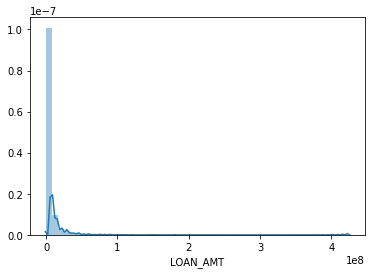

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


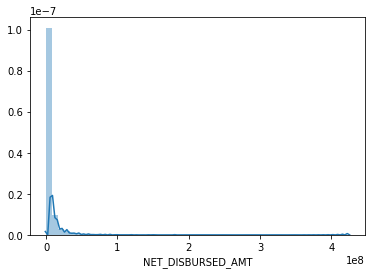

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


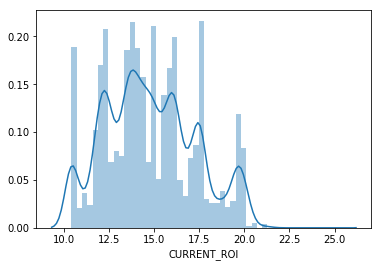

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


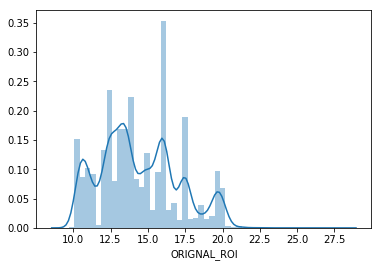

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


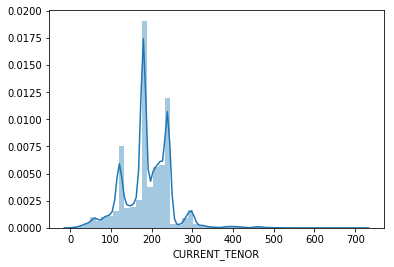

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


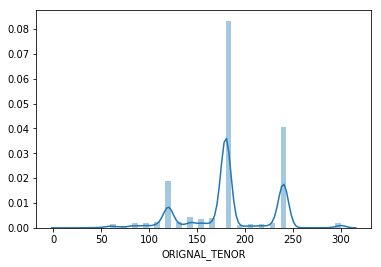

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


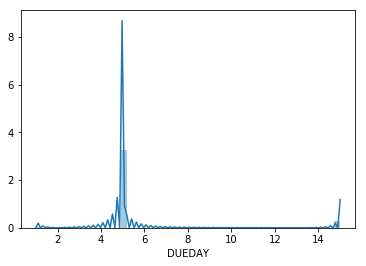

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


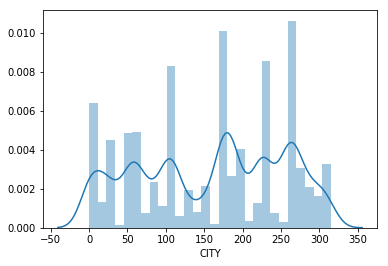

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


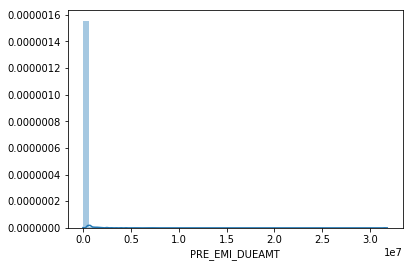

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


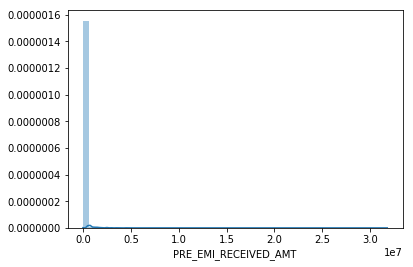

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


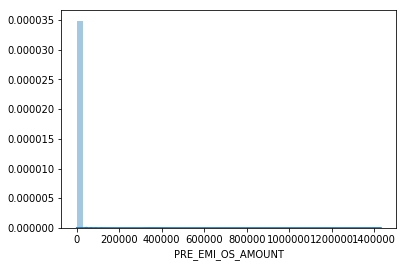

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


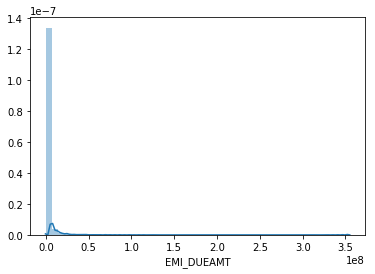

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


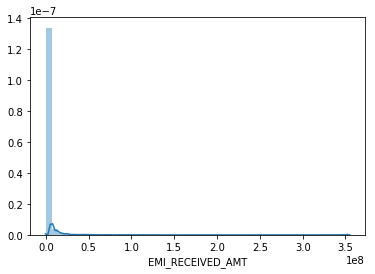

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


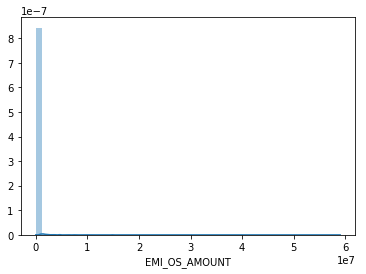

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


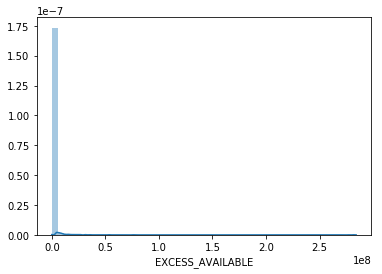

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


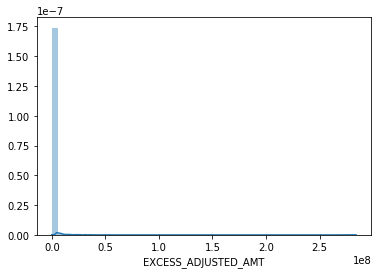

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


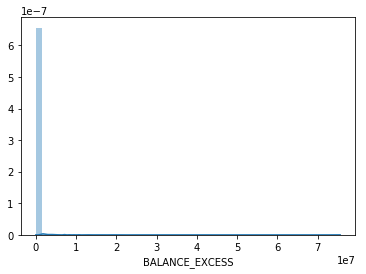

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


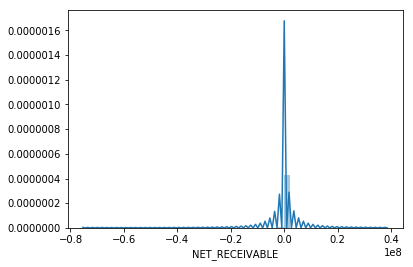

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


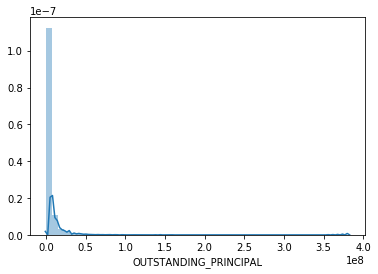

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


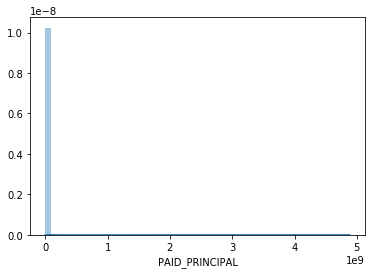

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


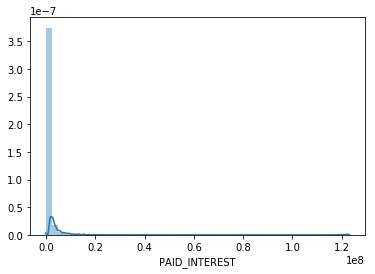

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


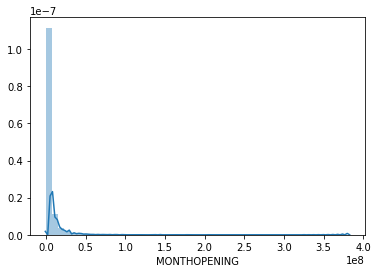

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


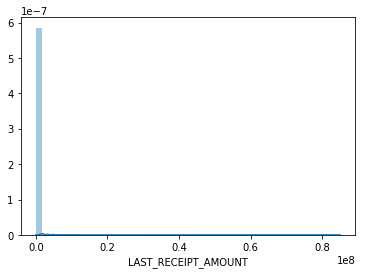

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


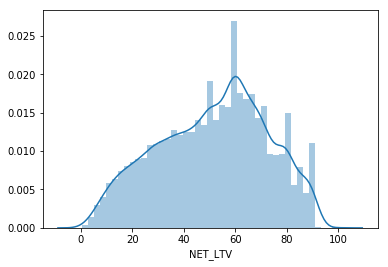

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


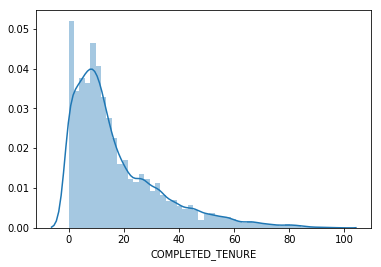

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


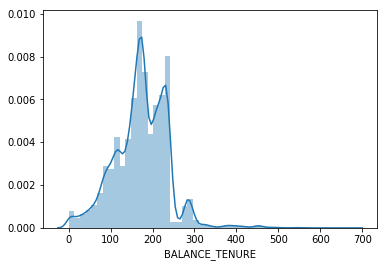

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


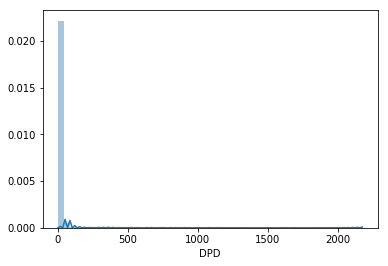

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


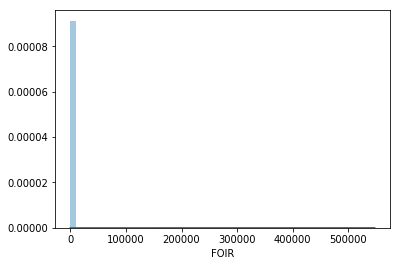

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


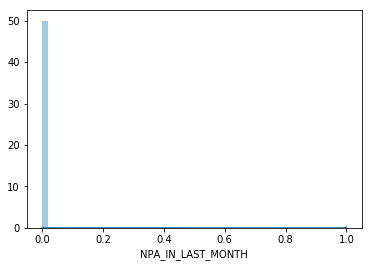

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


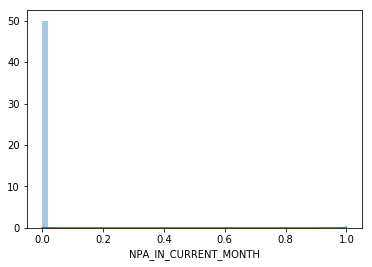

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


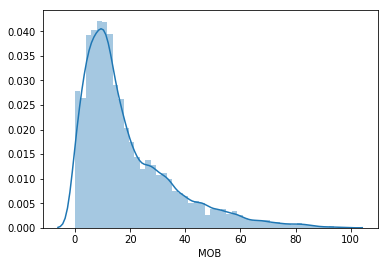

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


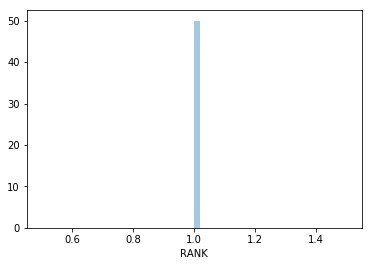

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


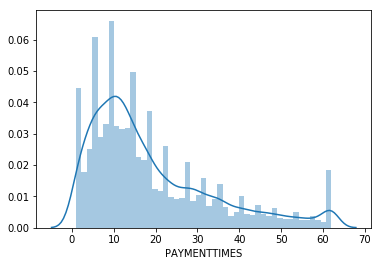

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


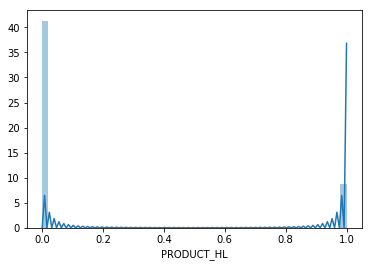

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


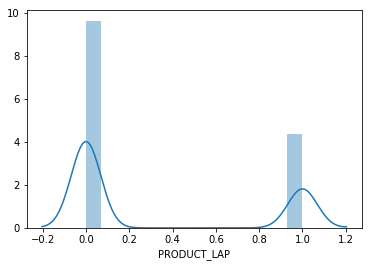

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


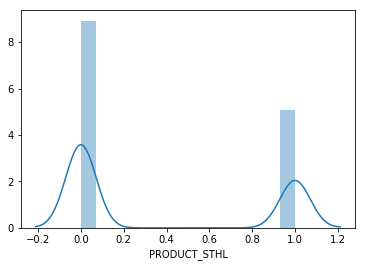

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


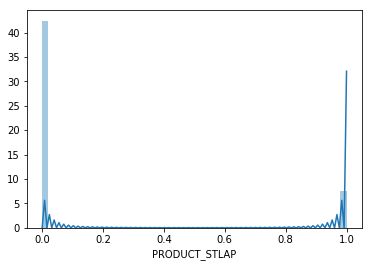

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


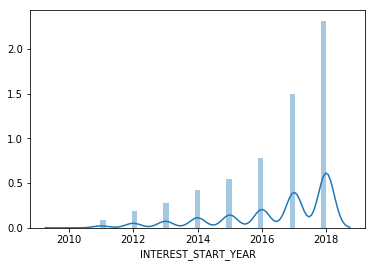

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


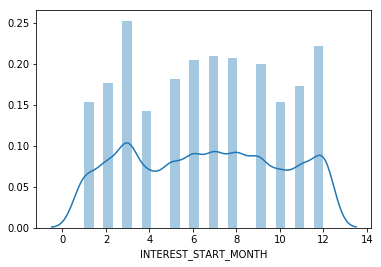

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


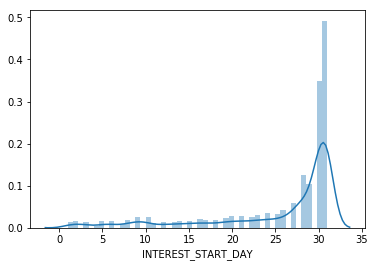

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


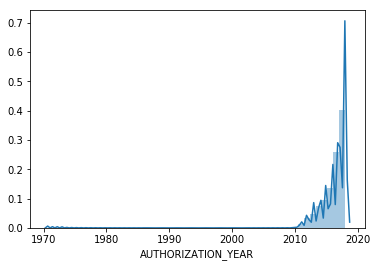

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


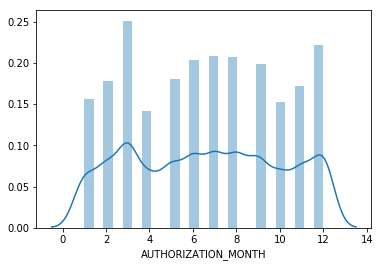

D:\Users\Vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


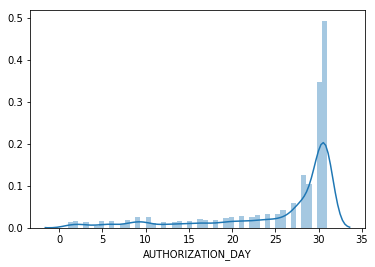

In [116]:
#scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
for col in train_wc.iloc[:,1:44].columns:
    sns.distplot(train_wc[col])
    plt.show()

In [117]:
train_wc.columns

Index(['AGREEMENTID', 'LOAN_AMT', 'NET_DISBURSED_AMT', 'CURRENT_ROI',
       'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR', 'DUEDAY', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_AMOUNT', 'NET_LTV', 'COMPLETED_TENURE',
       'BALANCE_TENURE', 'DPD', 'FOIR', 'NPA_IN_LAST_MONTH',
       'NPA_IN_CURRENT_MONTH', 'MOB', 'RANK', 'PAYMENTTIMES', 'PRODUCT_HL',
       'PRODUCT_LAP', 'PRODUCT_STHL', 'PRODUCT_STLAP', 'INTEREST_START_YEAR',
       'INTEREST_START_MONTH', 'INTEREST_START_DAY', 'AUTHORIZATION_YEAR',
       'AUTHORIZATION_MONTH', 'AUTHORIZATION_DAY', 'LAST_RECEIPT_YEAR',
       'LAST_RECEIPT_MONTH', 'LAST_RECEIPT_DAY', 'TARGET'],
      dtype='object')

In [118]:
test_wc.columns

Index(['AGREEMENTID', 'LOAN_AMT', 'NET_DISBURSED_AMT', 'CURRENT_ROI',
       'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR', 'DUEDAY', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_AMOUNT', 'NET_LTV', 'COMPLETED_TENURE',
       'BALANCE_TENURE', 'DPD', 'FOIR', 'NPA_IN_LAST_MONTH',
       'NPA_IN_CURRENT_MONTH', 'MOB', 'RANK', 'PAYMENTTIMES', 'PRODUCT_HL',
       'PRODUCT_LAP', 'PRODUCT_STHL', 'PRODUCT_STLAP', 'INTEREST_START_YEAR',
       'INTEREST_START_MONTH', 'INTEREST_START_DAY', 'AUTHORIZATION_YEAR',
       'AUTHORIZATION_MONTH', 'AUTHORIZATION_DAY', 'LAST_RECEIPT_YEAR',
       'LAST_RECEIPT_MONTH', 'LAST_RECEIPT_DAY'],
      dtype='object')

In [119]:
#Log Transoformation
ltrain_wc=train_wc.copy()
ltest_wc=test_wc.copy()

In [120]:
ltrain_wc['LOAN_AMT']=np.log(train_wc['LOAN_AMT'])
ltest_wc['LOAN_AMT']=np.log(test_wc['LOAN_AMT'])
ltrain_wc['NET_DISBURSED_AMT']=np.log(train_wc['NET_DISBURSED_AMT'])
ltest_wc['NET_DISBURSED_AMT']=np.log(test_wc['NET_DISBURSED_AMT'])
ltrain_wc['PRE_EMI_DUEAMT']=np.log(train_wc['PRE_EMI_DUEAMT'])
ltest_wc['PRE_EMI_DUEAMT']=np.log(test_wc['PRE_EMI_DUEAMT'])
ltrain_wc['PRE_EMI_RECEIVED_AMT']=np.log(train_wc['PRE_EMI_RECEIVED_AMT'])
ltest_wc['PRE_EMI_RECEIVED_AMT']=np.log(test_wc['PRE_EMI_RECEIVED_AMT'])
ltrain_wc['PRE_EMI_OS_AMOUNT']=np.log(train_wc['PRE_EMI_OS_AMOUNT'])
ltest_wc['PRE_EMI_OS_AMOUNT']=np.log(test_wc['PRE_EMI_OS_AMOUNT'])
ltrain_wc['PRE_EMI_OS_AMOUNT']=np.log(train_wc['PRE_EMI_OS_AMOUNT'])
ltest_wc['PRE_EMI_OS_AMOUNT']=np.log(test_wc['PRE_EMI_OS_AMOUNT'])
ltrain_wc['EMI_DUEAMT']=np.log(train_wc['EMI_DUEAMT'])
ltest_wc['EMI_DUEAMT']=np.log(test_wc['EMI_DUEAMT'])
ltrain_wc['EMI_DUEAMT']=np.log(train_wc['EMI_DUEAMT'])
ltest_wc['EMI_DUEAMT']=np.log(test_wc['EMI_DUEAMT'])

# Training the model

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [122]:
X_train, X_test, y_train, y_test = train_test_split(train_wc.iloc[:,0:47], train_wc.iloc[:,47:], test_size=0.33, random_state=28)

In [123]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13408, 47)
(6604, 47)
(13408, 1)
(6604, 1)


In [124]:
model1=LogisticRegression()
model2=tree.DecisionTreeClassifier(criterion='gini')
model3 =svm.SVC(kernel='rbf')
#model4 =GaussianNB()
model5=KNeighborsClassifier(n_neighbors=6)
model6= RandomForestClassifier()

In [125]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
#model4.fit(X_train,y_train)
model5.fit(X_train,y_train)
model6.fit(X_train,y_train)

D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\Vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
D:\Users\Vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [126]:
from sklearn.metrics import accuracy_score
from scipy import stats
pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)
#pred4=model4.predict(X_test)
pred5=model5.predict(X_test)
pred6=model6.predict(X_test)

print("Model1",accuracy_score(y_test, pred1))
print("Model2",accuracy_score(y_test, pred2))
print("Model3",accuracy_score(y_test, pred3))
#print("Model4",accuracy_score(y_test, pred4))
print("Model5",accuracy_score(y_test, pred5))
print("Model6",accuracy_score(y_test, pred6))

Model1 0.9109630526953362
Model2 0.985160508782556
Model3 0.9127801332525742
Model5 0.9092973955178679
Model6 0.9839491217443973


# Boosting

In [127]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import metrics

In [128]:
X_train.columns

Index(['AGREEMENTID', 'LOAN_AMT', 'NET_DISBURSED_AMT', 'CURRENT_ROI',
       'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR', 'DUEDAY', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_AMOUNT', 'NET_LTV', 'COMPLETED_TENURE',
       'BALANCE_TENURE', 'DPD', 'FOIR', 'NPA_IN_LAST_MONTH',
       'NPA_IN_CURRENT_MONTH', 'MOB', 'RANK', 'PAYMENTTIMES', 'PRODUCT_HL',
       'PRODUCT_LAP', 'PRODUCT_STHL', 'PRODUCT_STLAP', 'INTEREST_START_YEAR',
       'INTEREST_START_MONTH', 'INTEREST_START_DAY', 'AUTHORIZATION_YEAR',
       'AUTHORIZATION_MONTH', 'AUTHORIZATION_DAY', 'LAST_RECEIPT_YEAR',
       'LAST_RECEIPT_MONTH', 'LAST_RECEIPT_DAY'],
      dtype='object')

In [129]:
model_def=XGBClassifier()
model_def.fit(X_train ,y_train)
pred_def=model_def.predict(X_test)
print("Modeldef",accuracy_score(y_test, pred_def))

D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Modeldef 0.987886129618413


In [130]:
model7 = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model7.fit(X_train,y_train)
pred7=model7.predict(X_test)
print("Model7",accuracy_score(y_test, pred7))

D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model7 0.9912174439733494


# Tuning Xgboost

In [131]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['TARGET'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['TARGET'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['TARGET'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['TARGET'], dtrain_predprob))

In [132]:
predictors =[x for x in train_wc.columns if x not in ['TARGET', 'AGREEMENTID']]
xgb1 = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
modelfit(xgb1, train_wc, predictors)


Model Report
Accuracy : 0.9994
AUC Score (Train): 0.999994


In [133]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train_wc[predictors],train_wc['TARGET'])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([4.77980795, 3.51001782, 3.0135447 , 4.59890742, 4.46606264,
         4.30229983, 6.07795444, 5.51286435, 5.23101749, 6.46771207,
         6.22735443, 5.33374267]),
  'std_fit_time': array([0.45483734, 0.23055595, 0.14023331, 0.41863067, 0.36918233,
         0.38140261, 0.34617388, 0.23662606, 0.49014302, 0.54635889,
         0.47859928, 0.64350495]),
  'mean_score_time': array([0.03291197, 0.02253952, 0.02234011, 0.02553196, 0.0235374 ,
         0.02373676, 0.02533236, 0.02493372, 0.02633004, 0.02533259,
         0.026928  , 0.02593107]),
  'std_score_time': array([0.0088757 , 0.00135273, 0.00149285, 0.0020539 , 0.00135293,
         0.00171591, 0.00205367, 0.00166892, 0.00499084, 0.0033735 ,
         0.00089202, 0.00492654]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
         

In [134]:
from sklearn.model_selection import GridSearchCV
param_test2 = {
 'max_depth':range(1,5,1)
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train_wc[predictors],train_wc['TARGET'])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([3.31094947, 3.49366145, 3.27424793, 4.94458356, 4.86260266,
         4.60229855, 6.14437642, 5.67024422, 5.54078999, 6.9234941 ,
         6.32190213, 5.45900898]),
  'std_fit_time': array([0.11237646, 0.35092599, 0.08875493, 0.13287771, 0.27128971,
         0.21119908, 0.2377202 , 0.51580053, 0.35126466, 0.70846919,
         0.65342248, 0.95796212]),
  'mean_score_time': array([0.02313838, 0.02254028, 0.02194157, 0.0263298 , 0.02553167,
         0.02453437, 0.02652926, 0.0259306 , 0.02732692, 0.0261301 ,
         0.02652941, 0.02333746]),
  'std_score_time': array([0.00132333, 0.00241043, 0.00109249, 0.00371052, 0.00162056,
         0.00162048, 0.00264624, 0.00260093, 0.00079758, 0.00305142,
         0.00232636, 0.00729072]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
         

In [135]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train_wc[predictors],train_wc['TARGET'])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([4.02563767, 4.01865778, 4.05815263, 4.08647699, 3.73421831]),
  'std_fit_time': array([0.31670271, 0.24217827, 0.07119545, 0.46582145, 0.89244684]),
  'mean_score_time': array([0.02393565, 0.02373676, 0.02353745, 0.02273951, 0.01954794]),
  'std_score_time': array([0.00178401, 0.00203415, 0.00101728, 0.00171588, 0.00457467]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.98416063, 0.98474541, 0.9851601 , 0.98392978, 0.98494415]),
  'split1_test_score': array([0.98754162, 0.98801479, 0.98745066, 0.9877526 , 0.98750264]),
  'split2_test_score': array([0.99847458, 0.99879572, 0.99861374, 0.99852505, 0.99840194]),
  'split3_test_score': array([0.99888824, 0.99897388, 0.99877584, 0.99888365, 0.99887983]),

In [136]:
model9 = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=3,min_child_weight=1,gamma=0.1,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model9.fit(X_train,y_train)
pred9=model9.predict(X_test)
print("Model9",accuracy_score(y_test, pred9))

D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model9 0.9915202907328892


In [137]:
param_test4 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train_wc[predictors],train_wc['TARGET'])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([4.97789311, 4.93620605, 4.85881262, 5.17676291, 5.37124314,
         5.30182858, 5.26692195, 5.60581636, 4.80915475]),
  'std_fit_time': array([0.36668325, 0.20476762, 0.11087897, 0.34889446, 0.27525651,
         0.23725729, 0.19546803, 0.14220261, 1.1797856 ]),
  'mean_score_time': array([0.0269279 , 0.0271275 , 0.02533216, 0.02573133, 0.02593079,
         0.02553172, 0.02493343, 0.02593064, 0.02293954]),
  'std_score_time': array([0.00244316, 0.00146569, 0.00119696, 0.00171568, 0.0006309 ,
         0.00079772, 0.00141067, 0.00166892, 0.00560486]),
  'param_colsample_bytree': masked_array(data=[0.75, 0.75, 0.75, 0.8, 0.8, 0.8, 0.85, 0.85, 0.85],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.75, 0.8, 0.85, 0.75, 0.8, 0.85, 0.75, 0.8, 0.85],
               mask=[False, False, False, False, False, False, Fals

In [138]:
param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train_wc[predictors],train_wc['TARGET'])
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([5.49550991, 5.05309353, 5.26951528, 5.25515342, 3.30975318]),
  'std_fit_time': array([0.28545055, 0.19131632, 0.03840768, 0.50284569, 0.59808587]),
  'mean_score_time': array([0.02672873, 0.02573152, 0.02593083, 0.02573137, 0.01894956]),
  'std_score_time': array([0.00159581, 0.00193373, 0.0014105 , 0.00171585, 0.0049666 ]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.98508633, 0.98486618, 0.9845436 , 0.98643246, 0.72342715]),
  'split1_test_score': array([0.98785962, 0.98727943, 0.98763259, 0.9883626 , 0.98285043]),
  'split2_test_score': array([0.99824214, 0.99819779, 0.99828725, 0.9985411 , 0.99800893]),
  'split3_test_score': array([0.99878808, 0.99852963, 0.99878119,

In [139]:
param_test6 = {
 'reg_alpha':[0.5,0.6,0.7,0.8,0.9,1]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train_wc[predictors],train_wc['TARGET'])
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

({'mean_fit_time': array([5.23021898, 5.28088474, 5.47795758, 5.08181696, 5.36406193,
         4.56021075]),
  'std_fit_time': array([0.56189202, 0.33296898, 0.48923809, 0.25433831, 0.19702825,
         0.7961955 ]),
  'mean_score_time': array([0.02632971, 0.02832422, 0.02652931, 0.02712736, 0.02692852,
         0.02513294]),
  'std_score_time': array([0.0018498 , 0.00396972, 0.00162056, 0.0007462 , 0.00178417,
         0.00263117]),
  'param_reg_alpha': masked_array(data=[0.5, 0.6, 0.7, 0.8, 0.9, 1],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0.5},
   {'reg_alpha': 0.6},
   {'reg_alpha': 0.7},
   {'reg_alpha': 0.8},
   {'reg_alpha': 0.9},
   {'reg_alpha': 1}],
  'split0_test_score': array([0.98733905, 0.98555301, 0.98661936, 0.98456959, 0.98639844,
         0.98643246]),
  'split1_test_score': array([0.98849102, 0.98845586, 0.98835878, 0.98818067, 0.98862403,
         0.9883626 ]),
  

In [140]:
param_test7 = {
 'reg_alpha':[0.40,0.42,0.44,0.46,0.48,0.50]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(train_wc[predictors],train_wc['TARGET'])
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

({'mean_fit_time': array([5.26033907, 5.07503467, 5.20488791, 5.38001928, 5.35747995,
         4.74592104]),
  'std_fit_time': array([0.40088449, 0.33992076, 0.32680489, 0.22248288, 0.25600888,
         0.93785833]),
  'mean_score_time': array([0.02632947, 0.02533216, 0.02732668, 0.02712731, 0.02712774,
         0.02433558]),
  'std_score_time': array([0.00162007, 0.00135291, 0.0016203 , 0.00171584, 0.00212958,
         0.00552023]),
  'param_reg_alpha': masked_array(data=[0.4, 0.42, 0.44, 0.46, 0.48, 0.5],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0.4},
   {'reg_alpha': 0.42},
   {'reg_alpha': 0.44},
   {'reg_alpha': 0.46},
   {'reg_alpha': 0.48},
   {'reg_alpha': 0.5}],
  'split0_test_score': array([0.98629754, 0.98602274, 0.98662127, 0.98619129, 0.98658802,
         0.98733905]),
  'split1_test_score': array([0.98791848, 0.9876494 , 0.98776407, 0.98821736, 0.98788867,
         0.98

In [141]:
param_test8 = {
 'reg_alpha':[0.40,0.41,0.42,0.43,0.44,0.45]
}
gsearch8 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test8, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch8.fit(train_wc[predictors],train_wc['TARGET'])
gsearch8.cv_results_, gsearch8.best_params_, gsearch8.best_score_

({'mean_fit_time': array([5.47317038, 5.30043221, 5.19790659, 5.41213384, 5.32616329,
         4.72536931]),
  'std_fit_time': array([0.73485068, 0.25290861, 0.15960806, 0.3609297 , 0.21377934,
         0.76340931]),
  'mean_score_time': array([0.02772603, 0.02553191, 0.02553167, 0.02712741, 0.0253325 ,
         0.02773304]),
  'std_score_time': array([0.00469475, 0.00241027, 0.00184974, 0.00182817, 0.00101696,
         0.00276725]),
  'param_reg_alpha': masked_array(data=[0.4, 0.41, 0.42, 0.43, 0.44, 0.45],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0.4},
   {'reg_alpha': 0.41},
   {'reg_alpha': 0.42},
   {'reg_alpha': 0.43},
   {'reg_alpha': 0.44},
   {'reg_alpha': 0.45}],
  'split0_test_score': array([0.98629754, 0.9865112 , 0.98602274, 0.98593903, 0.98662127,
         0.9858989 ]),
  'split1_test_score': array([0.98791848, 0.9872114 , 0.9876494 , 0.98834502, 0.98776407,
         0.

In [142]:
param_test9 = {
 'nthread':[1,2,3,4,5,6]
}
gsearch9 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test9, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch9.fit(train_wc[predictors],train_wc['TARGET'])
gsearch9.cv_results_, gsearch9.best_params_, gsearch9.best_score_

({'mean_fit_time': array([6.851685  , 5.31198606, 4.9818831 , 5.41771941, 5.44205413,
         4.25762014]),
  'std_fit_time': array([0.44053611, 0.52200252, 0.41843743, 0.35082436, 0.34233053,
         0.74131715]),
  'mean_score_time': array([0.03271251, 0.03191481, 0.02792544, 0.02812476, 0.02433486,
         0.02333751]),
  'std_score_time': array([0.001163  , 0.00302532, 0.0018922 , 0.0024754 , 0.00079765,
         0.00079798]),
  'param_nthread': masked_array(data=[1, 2, 3, 4, 5, 6],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'nthread': 1},
   {'nthread': 2},
   {'nthread': 3},
   {'nthread': 4},
   {'nthread': 5},
   {'nthread': 6}],
  'split0_test_score': array([0.98508633, 0.98508633, 0.98508633, 0.98508633, 0.98508633,
         0.98508633]),
  'split1_test_score': array([0.98785962, 0.98785962, 0.98785962, 0.98785962, 0.98785962,
         0.98785962]),
  'split2_test_score': array([0.9982

In [143]:
model10 = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=3,min_child_weight=1,gamma=0.1,subsample=0.75,colsample_bytree=0.85,reg_alpha=0.44,objective= 'binary:logistic',nthread=1,scale_pos_weight=1,seed=27)
model10.fit(X_train,y_train)
pred10=model10.predict(X_test)
print("Model10",accuracy_score(y_test, pred10))

D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model10 0.9900060569351908


In [144]:
model11 = XGBClassifier(learning_rate =0.01,n_estimators=5000,max_depth=3,min_child_weight=1,gamma=0.3,subsample=0.85,colsample_bytree=0.85,reg_alpha=0.44,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model11.fit(X_train,y_train)
pred11=model11.predict(X_test)
print("Model11",accuracy_score(y_test, pred11))

D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model11 0.9921259842519685


In [145]:
model12 = XGBClassifier(learning_rate =0.02,n_estimators=5000,max_depth=3,min_child_weight=1,gamma=0.3,subsample=0.85,colsample_bytree=0.85,reg_alpha=0.44,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model12.fit(X_train,y_train)
pred12=model12.predict(X_test)
print("Model12",accuracy_score(y_test, pred12))

D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model12 0.9919745608721987


In [146]:
model13 = XGBClassifier(learning_rate =0.025,n_estimators=5000,max_depth=3,min_child_weight=1,gamma=0.3,subsample=0.85,colsample_bytree=0.85,reg_alpha=0.44,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model13.fit(X_train,y_train)
pred13=model13.predict(X_test)
print("Model13",accuracy_score(y_test, pred13))

D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model13 0.9918231374924288


In [147]:
model14 = XGBClassifier(learning_rate =0.025,n_estimators=3600,max_depth=3,min_child_weight=1,gamma=0.3,subsample=0.85,colsample_bytree=0.85,reg_alpha=0.44,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model14.fit(X_train,y_train)
pred14=model14.predict(X_test)
print("Model14",accuracy_score(y_test, pred14))

D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model14 0.991671714112659


In [148]:
lX_train, lX_test, ly_train, ly_test = train_test_split(ltrain_wc.iloc[:,0:47], ltrain_wc.iloc[:,47:], test_size=0.33, random_state=28)

In [149]:
model16 = XGBClassifier(learning_rate =0.01,n_estimators=5000,max_depth=3,min_child_weight=1,gamma=0.3,subsample=0.85,colsample_bytree=0.85,reg_alpha=0.44,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model16.fit(lX_train,ly_train)
pred16=model16.predict(lX_test)
print("Model16",accuracy_score(ly_test, pred16))

D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model16 0.9921259842519685


# Using Customer Data

In [150]:
train_c.shape

(5652, 54)

In [151]:
#Coverting to datetime format
train_c['INTEREST_START_DATE']=pd.to_datetime(train_c['INTEREST_START_DATE'])
train_c['AUTHORIZATIONDATE']=pd.to_datetime(train_c['AUTHORIZATIONDATE'])
train_c['LAST_RECEIPT_DATE']=pd.to_datetime(train_c['LAST_RECEIPT_DATE'])

test_c['INTEREST_START_DATE']=pd.to_datetime(test_c['INTEREST_START_DATE'])
test_c['AUTHORIZATIONDATE']=pd.to_datetime(test_c['AUTHORIZATIONDATE'])
test_c['LAST_RECEIPT_DATE']=pd.to_datetime(test_c['LAST_RECEIPT_DATE'])

In [152]:
#Stripping date into year month and day
train_c['INTEREST_START_YEAR'] = train_c['INTEREST_START_DATE'].dt.year
train_c['INTEREST_START_MONTH'] = train_c['INTEREST_START_DATE'].dt.month
train_c['INTEREST_START_DAY'] = train_c['INTEREST_START_DATE'].dt.day
train_c['AUTHORIZATION_YEAR'] = train_c['AUTHORIZATIONDATE'].dt.year
train_c['AUTHORIZATION_MONTH'] = train_c['AUTHORIZATIONDATE'].dt.month
train_c['AUTHORIZATION_DAY'] = train_c['AUTHORIZATIONDATE'].dt.day
train_c['LAST_RECEIPT_YEAR'] = train_c['LAST_RECEIPT_DATE'].dt.year
train_c['LAST_RECEIPT_MONTH'] = train_c['LAST_RECEIPT_DATE'].dt.month
train_c['LAST_RECEIPT_DAY'] = train_c['LAST_RECEIPT_DATE'].dt.day

test_c['INTEREST_START_YEAR'] = test_c['INTEREST_START_DATE'].dt.year
test_c['INTEREST_START_MONTH'] = test_c['INTEREST_START_DATE'].dt.month
test_c['INTEREST_START_DAY'] = test_c['INTEREST_START_DATE'].dt.day
test_c['AUTHORIZATION_YEAR'] = test_c['AUTHORIZATIONDATE'].dt.year
test_c['AUTHORIZATION_MONTH'] = test_c['AUTHORIZATIONDATE'].dt.month
test_c['AUTHORIZATION_DAY'] = test_c['AUTHORIZATIONDATE'].dt.day
test_c['LAST_RECEIPT_YEAR'] = test_c['LAST_RECEIPT_DATE'].dt.year
test_c['LAST_RECEIPT_MONTH'] = test_c['LAST_RECEIPT_DATE'].dt.month
test_c['LAST_RECEIPT_DAY'] = test_c['LAST_RECEIPT_DATE'].dt.day

In [153]:
train_c['TARGET']=train_c['FORECLOSURE']

In [154]:
del train_c['FORECLOSURE']

In [155]:
del train_c['INTEREST_START_DATE']
del train_c['AUTHORIZATIONDATE']
del train_c['LAST_RECEIPT_DATE']

In [156]:
del test_c['INTEREST_START_DATE']
del test_c['AUTHORIZATIONDATE']
del test_c['LAST_RECEIPT_DATE']

In [157]:
train_c['AGE']=train_c['AGE'].astype('float64')

In [158]:
train_c.index=np.arange(0,train_c.shape[0])

In [159]:
train_c.tail()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,CITY,...,INTEREST_START_YEAR,INTEREST_START_MONTH,INTEREST_START_DAY,AUTHORIZATION_YEAR,AUTHORIZATION_MONTH,AUTHORIZATION_DAY,LAST_RECEIPT_YEAR,LAST_RECEIPT_MONTH,LAST_RECEIPT_DAY,TARGET
5647,11253348,12033889.0,5044353.89,4744094.73,13.4,13.4,228.0,228,5,264,...,2015,7,7,2015,7,7,2015,7,13,0.0
5648,11253349,12033890.0,9251146.86,9251146.86,13.4,13.4,240.0,240,5,225,...,2015,6,30,2015,6,30,2015,5,7,0.0
5649,11253350,12033891.0,2299950.64,2299950.64,13.1,13.1,240.0,240,5,106,...,2015,6,29,2015,6,29,2015,6,27,0.0
5650,11253351,12033892.0,21018141.20,21018141.20,15.6,15.6,96.0,96,5,2,...,2015,7,31,2015,7,31,2015,2,7,0.0
5651,11253354,12033895.0,11259718.50,11259718.50,14.5,14.5,120.0,120,5,85,...,2015,8,31,2015,8,31,2015,8,21,0.0


In [160]:
test_c.index=np.arange(0,test_c.shape[0])

In [161]:
test_c.head()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,CITY,...,PRODUCT_STLAP,INTEREST_START_YEAR,INTEREST_START_MONTH,INTEREST_START_DAY,AUTHORIZATION_YEAR,AUTHORIZATION_MONTH,AUTHORIZATION_DAY,LAST_RECEIPT_YEAR,LAST_RECEIPT_MONTH,LAST_RECEIPT_DAY
0,11220003,12001002.0,4053498.66,4053498.66,16.5,12.5,311.0,180,5,176,...,0,2010,6,9,2010,6,9,2017,5,12
1,11220004,12001003.0,13257031.92,13257031.92,15.6,10.9,198.0,180,5,176,...,0,2010,9,29,2010,9,29,2013,5,11
2,11220005,12001004.0,13211403.04,13211403.04,16.5,11.9,142.0,180,5,176,...,0,2010,6,9,2010,6,9,2014,5,7
3,11220007,12001006.0,6155312.78,6155312.78,16.5,12.5,262.0,180,5,176,...,0,2010,11,10,2010,11,10,2014,5,8
4,11220009,12001008.0,9499284.03,9499284.03,18.9,13.6,52.0,180,5,176,...,0,2010,10,11,2010,5,11,2014,11,6


In [162]:
a=train_c.append(test_c)

In [163]:
del a['TARGET']

In [164]:
a['AGE']=a['AGE'].astype('float64')

In [165]:
a=pd.get_dummies(a)

In [166]:
a.shape

(9447, 68)

In [167]:
ctrain=a.iloc[0:5992,:]
ctest=a.iloc[5992:,:]

In [168]:
ctrain['TARGET']=train_c['TARGET']

In [169]:
print(ctrain.shape);ctest.shape

(5992, 69)


(3455, 68)

In [170]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(ctrain.iloc[:,0:68],ctrain.iloc[:,68:], test_size=0.33, random_state=28)

In [171]:
y_trainc.head()

,TARGET
4033,0.0
4480,0.0
4085,0.0
905,0.0
1664,1.0


In [172]:
model17 = XGBClassifier(learning_rate =0.01,n_estimators=5000,max_depth=3,min_child_weight=1,gamma=0.3,subsample=0.85,colsample_bytree=0.85,reg_alpha=0.44,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model17.fit(X_trainc,y_trainc)
pred17=model17.predict(X_testc)
print("Model17",accuracy_score(y_testc, pred17))

D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model17 0.962082912032356


In [173]:
ctest.head()

,AGE,AGREEMENTID,AUTHORIZATION_DAY,AUTHORIZATION_MONTH,AUTHORIZATION_YEAR,BALANCE_EXCESS,BALANCE_TENURE,BRANCH_PINCODE,CITY,COMPLETED_TENURE,...,QUALIFICATION_DOCTRATE,QUALIFICATION_ENG,QUALIFICATION_GRAD,QUALIFICATION_MAT,QUALIFICATION_OTHERS,QUALIFICATION_POSTGRAD,QUALIFICATION_PRF,QUALIFICATION_UG,SEX_F,SEX_M
340,38.0,11221405,11,12,2012,0.0,228.0,400070.0,176,31,...,0,0,0,0,0,1,0,0,0,1
341,34.0,11221408,30,11,2012,0.0,152.0,411005.0,225,53,...,0,0,1,0,0,0,0,0,0,1
342,35.0,11221409,29,11,2012,0.0,163.0,411005.0,225,41,...,0,1,0,0,0,0,0,0,0,1
343,38.0,11221410,27,12,2012,0.0,284.0,411005.0,225,16,...,0,0,0,0,0,1,0,0,1,0
344,43.0,11221411,29,11,2012,0.0,176.0,400070.0,176,27,...,0,0,1,0,0,0,0,0,0,1


In [174]:
testpred17=model17.predict_proba(ctest)

In [175]:
predc=pd.DataFrame({'AGREEMENTID':ctest['AGREEMENTID'],'FORECLOSURE':testpred17[:,1]})

In [176]:
predc.head()

,AGREEMENTID,FORECLOSURE
340,11221405,0.984801
341,11221408,0.002292
342,11221409,0.002046
343,11221410,0.903840
344,11221411,0.026642


In [177]:
testpred11=model11.predict_proba(test_wc)

In [178]:
predcwc=pd.DataFrame({'AGREEMENTID':test_wc['AGREEMENTID'],'FORECLOSURE':testpred11[:,1]})

In [179]:
predcwc.head()

,AGREEMENTID,FORECLOSURE
2,11220003,0.775795
3,11220004,0.948791
4,11220005,0.987926
6,11220007,0.519748
8,11220009,0.000736


In [180]:
fpred=pd.merge(predcwc,predc,how='left',on='AGREEMENTID')

In [181]:
fpred.head()

,AGREEMENTID,FORECLOSURE_x,FORECLOSURE_y
0,11220003,0.775795,NaN
1,11220004,0.948791,NaN
2,11220005,0.987926,NaN
3,11220007,0.519748,NaN
4,11220009,0.000736,NaN


In [182]:
fpred['FORECLOSURE']=(fpred['FORECLOSURE_x']+fpred['FORECLOSURE_y'])/2

In [183]:
fpred.shape

(13342, 4)

In [184]:
fpred.head()

,AGREEMENTID,FORECLOSURE_x,FORECLOSURE_y,FORECLOSURE
0,11220003,0.775795,NaN,NaN
1,11220004,0.948791,NaN,NaN
2,11220005,0.987926,NaN,NaN
3,11220007,0.519748,NaN,NaN
4,11220009,0.000736,NaN,NaN


In [185]:
fpred.loc[fpred['FORECLOSURE'].isnull(),'FORECLOSURE']=fpred.loc[fpred['FORECLOSURE'].isnull(),'FORECLOSURE_x']

In [186]:
fpred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13342 entries, 0 to 13341
Data columns (total 4 columns):
AGREEMENTID      13342 non-null int64
FORECLOSURE_x    13342 non-null float32
FORECLOSURE_y    3455 non-null float32
FORECLOSURE      13342 non-null float32
dtypes: float32(3), int64(1)
memory usage: 364.8 KB


# Prediction on Test Data Set

In [187]:
#Using Ensemble Model
testpred9=model9.predict_proba(test_wc)
testpred11=model11.predict_proba(test_wc)
testpred12=model12.predict_proba(test_wc)
testpred13=model13.predict_proba(test_wc)
testpred16=model16.predict_proba(test_wc)
testpred17=model17.predict_proba(ctest)

In [188]:
final_pred=((testpred11[:,1]+testpred12[:,1]+testpred13[:,1]+testpred16[:,1]))/4

In [189]:
pd.DataFrame(final_pred).to_csv("submission16.csv")

In [190]:
pd.DataFrame(testpred11[:,1]).to_csv("submission17.csv")

In [191]:
pd.DataFrame(ctest.loc[:,'AGREEMENTID']).to_csv("custagree.csv")

In [192]:
pd.DataFrame(testpred17[:,1]).to_csv("submission18.csv")

In [193]:
pd.DataFrame(fpred.loc[:,['AGREEMENTID','FORECLOSURE']]).to_csv("submission19.csv")

In [194]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_testc, pred17)

array([[1424,   42],
       [  33,  479]], dtype=int64)

# Checking imbalance of data

In [195]:
train_wc['TARGET'].value_counts()

0.0    18217
1.0     1795
Name: TARGET, dtype: int64

In [196]:
ostrainwc=train_wc.copy()
ostestwc=test_wc.copy()

In [197]:
print(ostrainwc.shape);ostestwc.shape

(20012, 48)


(13342, 47)

In [198]:
ostrainwx=ostrainwc.iloc[:,0:47]
ostrainwy=ostrainwc.iloc[:,47:]

In [199]:
def makeOverSamplesSMOTE(X,y):
    from imblearn.over_sampling import SMOTE
    sm = SMOTE()
    X, y = sm.fit_sample(X, y)
    return X,y

In [200]:
ostrainwx,ostrainwy=makeOverSamplesSMOTE(ostrainwx,ostrainwy)

D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [201]:
print(ostrainwx.shape);ostrainwy.shape

(36434, 47)


(36434,)

In [202]:
X_ostrainwc, X_ostestwc, y_ostrainwc, y_ostestwc = train_test_split(ostrainwx,ostrainwy, test_size=0.33, random_state=28)

In [203]:
print(X_ostrainwc.shape)
print(y_ostrainwc.shape)
print(X_ostestwc.shape)
print(y_ostestwc.shape)

(24410, 47)
(24410,)
(12024, 47)
(12024,)


In [204]:
model18 = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=3,min_child_weight=1,gamma=0.3,subsample=0.85,colsample_bytree=0.85,reg_alpha=0.44,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model18.fit(X_ostrainwc,y_ostrainwc)
pred18=model18.predict(X_ostestwc)
print("Model18",accuracy_score(y_ostestwc, pred18))

D:\Users\Vikas\Anaconda3\lib\site-packages\xgboost\sklearn.py:229: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
D:\Users\Vikas\Anaconda3\lib\site-packages\xgboost\sklearn.py:236: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


Model18 0.9947604790419161


In [205]:
ostestwc=ostestwc.as_matrix()

In [206]:
testpred18=model18.predict_proba(ostestwc)

In [207]:
confusion_matrix(y_ostestwc, pred18)

array([[5943,   36],
       [  27, 6018]], dtype=int64)

In [208]:
pd.DataFrame(testpred18[:,1]).to_csv("submission23.csv")

# Email Data

In [209]:
emaildata=pd.read_csv('C:/Users/Vikas/Machine Learning/DSL/93fe009c-2-Foreclosure-Prediction-Dataset_/RF_Final_Data.csv',encoding = 'unicode_escape')

D:\Users\Vikas\Anaconda3\lib\site-packages\pandas\io\parsers.py:1848: DeprecationWarning: invalid escape sequence '\m'
  data = self._reader.read(nrows)
D:\Users\Vikas\Anaconda3\lib\site-packages\pandas\io\parsers.py:1848: DeprecationWarning: invalid escape sequence '\c'
  data = self._reader.read(nrows)
D:\Users\Vikas\Anaconda3\lib\site-packages\pandas\io\parsers.py:1848: DeprecationWarning: invalid escape sequence '\c'
  data = self._reader.read(nrows)
D:\Users\Vikas\Anaconda3\lib\site-packages\pandas\io\parsers.py:1848: DeprecationWarning: invalid escape sequence '\m'
  data = self._reader.read(nrows)
D:\Users\Vikas\Anaconda3\lib\site-packages\pandas\io\parsers.py:1848: DeprecationWarning: invalid escape sequence '\c'
  data = self._reader.read(nrows)
D:\Users\Vikas\Anaconda3\lib\site-packages\pandas\io\parsers.py:1848: DeprecationWarning: invalid escape sequence '\c'
  data = self._reader.read(nrows)
D:\Users\Vikas\Anaconda3\lib\site-packages\pandas\io\parsers.py:1848: DeprecationW

In [210]:
emaildata.head()

,TicketId,Type,SubType,Status,Date,Preprocessed_EmailBody,Preprocessed_Subject,Masked_CustomerID,Masked_AgreementID
0,571910,REQUEST,PROVISIONAL IT CERTIFICATE,Close,2019-01-23 16:34:00,"hi team, can you please provide me itcertifica...",loan account number - loannumber,12020736,0
1,572747,REQUEST,SOA,Close,2019-01-24 16:05:00,hi team can you please arrange the certificate...,certificate of interest and principal for home...,12019080,0
2,4622,General,Others,Close,2016-02-12 13:40:00,NaN,re: repaysch : loan number loannumber,12004815,0
3,4674,REQUEST,SOA,Close,2016-02-12 15:41:00,"dear sir, you for your promptreply, please not...",re: finalit : loan number loannumber,12005158,11230237
4,4681,QUERY,CHANGEOFROI,Close,2016-02-12 15:55:00,"dear sachin, for your mail. this seems a great...",re: fw: repaysch : loan number loannumber,12001022,0


In [211]:
emaildata['Type']=emaildata['Type'].replace('Request','REQUEST')

In [212]:
emaildata['Date'].value_counts().head()#dtype is int converting to datetime
emaildata['Date']=pd.to_datetime(emaildata['Date'])

In [213]:
#Deleting rows where both email and subject is null
edindex=emaildata[(emaildata['Preprocessed_EmailBody'].isnull())&(emaildata['Preprocessed_Subject'].isnull())].index
for i in edindex:
    emaildata=emaildata.drop([i])

In [214]:
#Copying Email Subjects to NA Email Content
emaildata.loc[emaildata['Preprocessed_EmailBody'].isnull(),'Preprocessed_EmailBody']=emaildata.loc[emaildata['Preprocessed_EmailBody'].isnull(),'Preprocessed_Subject']

In [215]:
#Assuming the subject content will be mentioned in email content dropping preprocessed subject
del emaildata['Preprocessed_Subject']

In [216]:
#Sorting data based on date
emaildata=emaildata.sort_values('Date')

In [217]:
#Masked Agreement ID is mostly 0 so no information 
del emaildata['Masked_AgreementID']

In [218]:
#Sorting data based on date
emaildata=emaildata.sort_values('Date')

In [219]:
emaildata['Masked_CustomerID'].nunique()

2705

# Text Preprocessing


In [220]:
emaildata['Preprocessed_EmailBody'] = emaildata['Preprocessed_EmailBody'].apply(lambda x: " ".join(x.lower() for x in x.split()))
emaildata['Preprocessed_EmailBody'] = emaildata['Preprocessed_EmailBody'].str.replace('[^\w\s]','')

<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-220-a6a9cba961c6>:2: DeprecationWarning: invalid escape sequence \w
  emaildata['Preprocessed_EmailBody'] = emaildata['Preprocessed_EmailBody'].str.replace('[^\w\s]','')


In [221]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
emaildata['Preprocessed_EmailBody'] = emaildata['Preprocessed_EmailBody'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [222]:
from textblob import TextBlob
from textblob import Word
emaildata['Preprocessed_EmailBody'] = emaildata['Preprocessed_EmailBody'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [223]:
emaildata['Sentiment'] = emaildata['Preprocessed_EmailBody'].apply(lambda x: TextBlob(x).sentiment[0] )
emaildata['Subjectivity'] = emaildata['Preprocessed_EmailBody'].apply(lambda x: TextBlob(x).sentiment[1] )

In [224]:
emaildata.loc[:,['Preprocessed_EmailBody','Sentiment','Subjectivity']].head(10)

,Preprocessed_EmailBody,Sentiment,Subjectivity
2,repaysch loan number loannumber,0.000000,0.000000
3,dear sir promptreply please note attach letter...,0.300000,0.450000
4,dear sachin mail seems great offer roi 9999 ch...,0.700000,0.825000
5,sir madam already send tds certificate 9 st 9 ...,0.000000,0.000000
6,sent samsung mobile,0.000000,0.000000
7,loannumber pls send statement account remainin...,0.000000,0.000000
8,dear sir home loan account loannumber account ...,0.300000,0.450000
9,edelweiss housing finance limited ref home loa...,0.264286,0.521429
10,hi sachin waiting reply vikas bafna tribal zon...,0.700000,0.825000
11,hi team pls send revised foreclosure document ...,0.000000,0.000000


In [225]:
edatasent=emaildata.groupby('Masked_CustomerID')['Sentiment'].mean().reset_index()

In [226]:
edatasubj=emaildata.groupby('Masked_CustomerID')['Subjectivity'].mean().reset_index()

In [227]:
edatainfo=pd.merge(edatasent,edatasubj,how='inner',on='Masked_CustomerID')

In [228]:
edatainfo.shape

(2705, 3)

In [229]:
textmergetrain=pd.merge(edatainfo,ctrain,how='left',left_on='Masked_CustomerID',right_on='CUSTOMERID')

In [230]:
textmergetest=pd.merge(edatainfo,ctest,how='left',left_on='Masked_CustomerID',right_on='CUSTOMERID')

In [231]:
textmergetrain=textmergetrain.dropna()
textmergetest=textmergetest.dropna()

In [232]:
textmergetrain.shape

(1103, 72)

In [233]:
X_trainxc, X_testxc, y_trainxc, y_testxc = train_test_split(textmergetrain.iloc[:,0:71],textmergetrain.iloc[:,71:], test_size=0.1, random_state=28)

In [234]:
modelx1=LogisticRegression()
modelx2=tree.DecisionTreeClassifier(criterion='gini')
modelx3 =svm.SVC(kernel='rbf')
modelx5=KNeighborsClassifier(n_neighbors=6)
modelx6= RandomForestClassifier()
modelx7=XGBClassifier()

In [235]:
modelx1.fit(X_trainxc,y_trainxc)
modelx2.fit(X_trainxc,y_trainxc)
modelx3.fit(X_trainxc,y_trainxc)
modelx5.fit(X_trainxc,y_trainxc)
modelx6.fit(X_trainxc,y_trainxc)
modelx7.fit(X_trainxc,y_trainxc)

D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\Vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
D:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [236]:
predx1=modelx1.predict(X_testxc)
predx2=modelx2.predict(X_testxc)
predx3=modelx3.predict(X_testxc)
predx5=modelx5.predict(X_testxc)
predx6=modelx6.predict(X_testxc)
predx7=modelx7.predict(X_testxc)

print("Modelx1",accuracy_score(y_testxc, predx1))
print("Modelx2",accuracy_score(y_testxc, predx2))
print("Modelx3",accuracy_score(y_testxc, predx3))
print("Modelx5",accuracy_score(y_testxc, predx5))
print("Modelx6",accuracy_score(y_testxc, predx6))
print("Modelx7",accuracy_score(y_testxc, predx7))

##Very few training dataset accuracy is low

Modelx1 0.6756756756756757
Modelx2 0.8558558558558559
Modelx3 0.6756756756756757
Modelx5 0.6036036036036037
Modelx6 0.9099099099099099
Modelx7 0.8828828828828829


<Figure size 3600x3600 with 0 Axes>

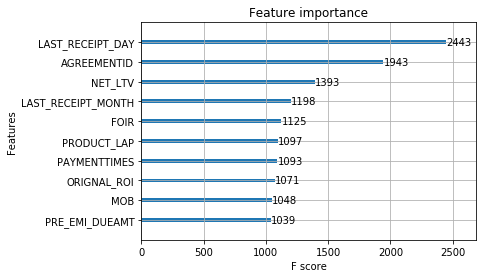

In [253]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
from matplotlib.pyplot import figure
plt.figure(figsize=(50,50))
plot_importance(model11,max_num_features=10)
plt.show()

In [298]:
last=train_wc.copy()

In [303]:
last.iloc[:,47:].head()

,TARGET
0,1.0
1,1.0
5,1.0
7,1.0
9,1.0


In [304]:
last['LRD_NETLTV']=last['LAST_RECEIPT_DAY']*last['NET_LTV']
last['LRD_LRM']=last['LAST_RECEIPT_DAY']*last['LAST_RECEIPT_MONTH']
last['LRD_FOIR']=last['LAST_RECEIPT_DAY']*last['FOIR']
last['LTV_LRM']=last['NET_LTV']*last['LAST_RECEIPT_MONTH']
last['LTV_LRM']=last['NET_LTV']*last['FOIR']
last['FOIR_LRM']=last['LAST_RECEIPT_MONTH']*last['FOIR']

In [305]:
last['FORECLOSURE']=last['TARGET']
del last['TARGET']

In [307]:
last.iloc[:,1:52].head()

,LOAN_AMT,NET_DISBURSED_AMT,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,...,AUTHORIZATION_MONTH,AUTHORIZATION_DAY,LAST_RECEIPT_YEAR,LAST_RECEIPT_MONTH,LAST_RECEIPT_DAY,LRD_NETLTV,LRD_LRM,LRD_FOIR,LTV_LRM,FOIR_LRM
0,11710107.24,11710107.24,13.4,10.6,45.0,120,1,176,7994.273589,7994.273589,...,8,29,2014,5,5,200.30,25,3.00,24.0360,3.00
1,19290253.32,19290253.32,13.7,10.6,137.0,180,1,176,100504.575900,100504.575900,...,9,15,2013,1,11,927.41,11,6.60,50.5860,0.60
5,3933395.00,3933395.00,15.6,11.5,312.0,180,5,176,5947.630536,5947.630536,...,2,11,2017,5,8,407.12,40,5.76,36.6408,3.60
7,10022587.71,10022587.71,11.2,10.6,91.0,180,1,264,60322.180780,60322.180780,...,6,10,2018,2,5,423.15,10,3.00,50.7780,1.20
9,7755937.31,7755937.31,15.0,10.9,304.0,180,5,176,27732.787460,27732.787460,...,10,26,2018,5,4,123.76,20,3.32,25.6802,4.15


In [308]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
last=scaler.fit_transform(last.iloc[:,1:52])

D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [311]:
pd.DataFrame(last).shape

(20012, 51)

In [313]:
X_trainl, X_testl, y_trainl, y_testl = train_test_split(last,train_wc.iloc[:,47:], test_size=0.33, random_state=28)

In [314]:
y_trainl.head()

,TARGET
21110,0.0
3663,0.0
11338,1.0
8923,0.0
13738,0.0


In [315]:
lastmodel = XGBClassifier(learning_rate =0.01,n_estimators=5000,max_depth=3,min_child_weight=1,gamma=0.3,subsample=0.85,colsample_bytree=0.85,reg_alpha=0.44,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
lastmodel.fit(X_trainl,y_trainl)
lastpred=lastmodel.predict(X_testl)
print("Last Model",accuracy_score(y_testl, lastpred))

D:\Users\Vikas\Anaconda3\lib\site-packages\xgboost\sklearn.py:229: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
D:\Users\Vikas\Anaconda3\lib\site-packages\xgboost\sklearn.py:236: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn

Last Model 0.9913688673531194


In [317]:
lasttest=test_wc.copy()

In [318]:
lasttest['LRD_NETLTV']=lasttest['LAST_RECEIPT_DAY']*lasttest['NET_LTV']
lasttest['LRD_LRM']=lasttest['LAST_RECEIPT_DAY']*lasttest['LAST_RECEIPT_MONTH']
lasttest['LRD_FOIR']=lasttest['LAST_RECEIPT_DAY']*lasttest['FOIR']
lasttest['LTV_LRM']=lasttest['NET_LTV']*lasttest['LAST_RECEIPT_MONTH']
lasttest['LTV_LRM']=lasttest['NET_LTV']*lasttest['FOIR']
lasttest['FOIR_LRM']=lasttest['LAST_RECEIPT_MONTH']*lasttest['FOIR']

In [319]:
lasttest.shape

(13342, 52)

In [320]:
from sklearn.preprocessing import StandardScaler
scalertest = StandardScaler()
lasttest=scalertest.fit_transform(lasttest.iloc[:,1:52])

D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [321]:
lastpred=lastmodel.predict_proba(lasttest)

In [323]:
pd.DataFrame(lastpred[:,1]).to_csv("submission24.csv")

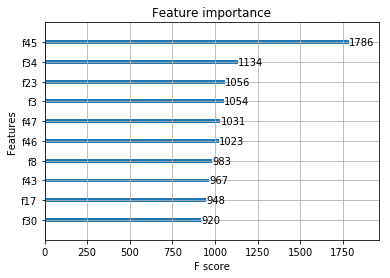

In [316]:
plot_importance(lastmodel,max_num_features=10)
plt.show()

# Ensembling

In [237]:
#Stacking
def Stacking(model,train,y,test,n_fold):
    folds=StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred=np.empty((test.shape[0],1),float)
    train_pred=np.empty((0,1),float)
    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]
        model.fit(X=x_train,y=y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
        test_pred=np.append(test_pred,model.predict(test))
    return test_pred.reshape(-1,1),train_pred

In [238]:
from sklearn.model_selection import StratifiedKFold
model1 = tree.DecisionTreeClassifier(random_state=1)

test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=X_train,test=X_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

In [239]:
model2 = KNeighborsClassifier()

test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=X_train,test=X_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

D:\Users\Vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
D:\Users\Vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
D:\Users\Vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
D:\Users\Vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == 

In [240]:
print(train_pred1.shape)
print(train_pred2.shape)
print(test_pred1.shape)
print(test_pred2.shape)

(13408, 1)
(13408, 1)
(72644, 1)
(72644, 1)


In [241]:
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LogisticRegression(random_state=1)
model.fit(df,y_train)
model.score(df_test, y_test)

D:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [6604, 72644]